In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clean up the data

In [2]:
df=pd.read_csv('fall_new.csv')

In [3]:
df.head()

,Unnamed: 0,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALL
0,0,3,4722.92,4019.64,-1600.00,13,79,317,1
1,1,2,4059.12,2191.03,-1146.08,20,54,165,0
2,2,2,4773.56,2787.99,-1263.38,46,67,224,0
3,3,4,8271.27,9545.98,-2848.93,26,138,554,0
4,4,4,7102.16,14148.80,-2381.15,85,120,809,0


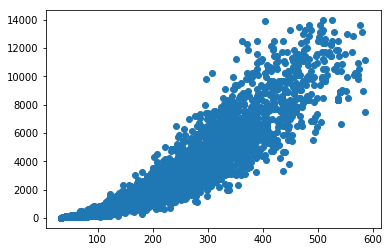

In [4]:
plt.scatter(df['HR'],df['CIRCLUATION'])

In [5]:
df.shape

(15371, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15371 entries, 0 to 15370
Data columns (total 9 columns):
Unnamed: 0     15371 non-null int64
ACTIVITY       15371 non-null int64
TIME           15371 non-null float64
SL             15371 non-null float64
EEG            15371 non-null float64
BP             15371 non-null int64
HR             15371 non-null int64
CIRCLUATION    15371 non-null int64
FALL           15371 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.1 MB


In [7]:
df.describe()

,Unnamed: 0,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALL
count,15371.000000,15371.000000,15371.000000,15371.000000,15371.000000,15371.000000,15371.000000,15371.000000,15371.000000
mean,8179.652723,2.426387,10247.851057,53267.499541,-3817.614867,51.873723,194.036497,2232.952118,0.224904
std,4728.415680,1.719940,4416.248581,66982.285846,3234.229303,35.858454,107.994399,2327.953915,0.417533
min,0.000000,0.000000,1954.230000,42.224200,-136530.000000,0.000000,33.000000,5.000000,0.000000
25%,4089.000000,0.000000,7062.605000,9439.780000,-5127.425000,24.000000,109.000000,553.000000,0.000000
50%,8181.000000,3.000000,9518.190000,28017.100000,-3192.580000,42.000000,174.000000,1469.000000,0.000000
75%,12279.500000,4.000000,12844.150000,69984.400000,-2035.820000,74.000000,248.000000,3209.000000,0.000000
max,16381.000000,5.000000,26320.900000,435761.000000,75300.000000,180.000000,586.000000,13972.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Unnamed: 0     0
ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
FALL           0
dtype: int64

In [12]:
df['ACTIVITY']=df['ACTIVITY'].astype(str)

# Preprocessing Data

1. Feature Scaling : Min Max Scaling 

In [24]:
X=df[['TIME','SL','EEG','BP','HR','CIRCLUATION']]
y=df['FALL']

In [25]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [26]:
X_minmax = min_max_scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
X_minmax

array([[0.11362611, 0.0091284 , 0.63697304, 0.07222222, 0.08318264,
        0.02233837],
       [0.08638398, 0.00493163, 0.63911589, 0.11111111, 0.03797468,
        0.01145557],
       [0.11570436, 0.00630169, 0.63856215, 0.25555556, 0.06148282,
        0.01567982],
       ...,
       [0.28392472, 0.06290221, 0.63097767, 0.18333333, 0.22242315,
        0.09730078],
       [0.23740462, 0.06064502, 0.6307405 , 0.53888889, 0.22242315,
        0.10854156],
       [0.3042726 , 0.08975256, 0.63050559, 0.11666667, 0.29475588,
        0.13460299]])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)

In [29]:
X_train

array([[0.21809176, 0.03223174, 0.63319369, 0.45555556, 0.15732369,
        0.05756426],
       [0.13328042, 0.01004243, 0.63982439, 0.08888889, 0.0994575 ,
        0.02054844],
       [0.32032732, 0.06331578, 0.6262569 , 0.15      , 0.29113924,
        0.10854156],
       ...,
       [0.67903288, 0.37089927, 0.60841241, 0.43333333, 0.64195298,
        0.44998926],
       [0.39338038, 0.26223973, 0.62857008, 0.26111111, 0.36528029,
        0.35082695],
       [0.97360739, 0.86780464, 0.56299863, 0.54444444, 0.91139241,
        0.85114914]])

In [30]:
y_train

13501    1
10580    0
4365     0
10620    1
1195     0
10240    0
4953     1
1423     0
5768     0
256      0
12954    0
9297     0
288      1
9711     0
6083     0
8791     0
10345    0
11519    1
4484     0
9232     0
11281    1
14725    0
9634     0
1232     0
15105    0
5846     0
2675     0
1112     1
5181     1
7320     0
        ..
3385     0
4555     0
1184     0
6420     0
5051     0
5311     0
2433     0
6949     0
13803    0
10583    0
769      0
1685     0
8322     0
11111    0
11363    0
11636    1
14423    0
5578     0
4426     1
13526    1
466      0
6265     0
5734     0
11284    1
11964    0
5191     0
13418    0
5390     0
860      1
7270     0
Name: FALL, Length: 10298, dtype: int64

2. K Nearest Neighbor Model

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.903/0.823
k: 5, Train/Test Score: 0.876/0.824
k: 7, Train/Test Score: 0.862/0.820
k: 9, Train/Test Score: 0.857/0.821
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.846/0.823
k: 15, Train/Test Score: 0.840/0.824
k: 17, Train/Test Score: 0.838/0.826
k: 19, Train/Test Score: 0.834/0.824


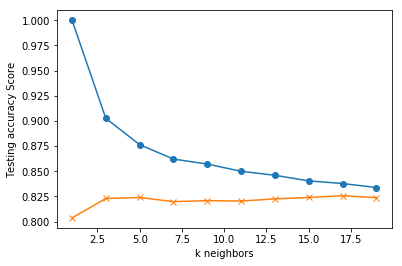

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

3. Looks like k: 5, Train/Test Score: 0.903/0.823 is a good choice in this try

4. Feature Scaling : Standard Scaling 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), random_state=42)

In [33]:
X_train.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
3411,10170.70,53420.0000,-4262.000,6,191,2596
144,11167.70,112064.0000,-3070.000,54,235,4905
9224,5105.42,3418.6600,-839.112,48,51,132
4802,2273.60,52.2644,-242.000,8,33,5
8129,7455.78,14692.4000,-2578.640,69,134,970


In [34]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [35]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [37]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 1.000/0.814
k: 3, Train/Test Score: 0.904/0.825
k: 5, Train/Test Score: 0.880/0.829
k: 7, Train/Test Score: 0.866/0.838


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.858/0.839
k: 11, Train/Test Score: 0.852/0.838


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.847/0.836
k: 15, Train/Test Score: 0.843/0.835


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.840/0.834


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.836/0.832


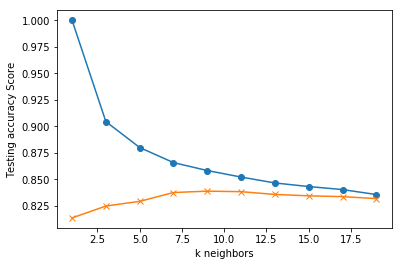

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

5. k: 3, Train/Test Score: 0.904/0.825, looks like this is the best one.

6. Feature scaling : Rubust Scaler 

In [39]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer  

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [40]:
X_RB=transformer.transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_RB, y.values.reshape(-1,1), random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.733/0.741
k: 3, Train/Test Score: 0.733/0.746


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.741/0.750


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.738/0.745


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.740/0.744


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.739/0.743


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.737/0.746


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.737/0.745


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.739/0.748


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.741/0.747


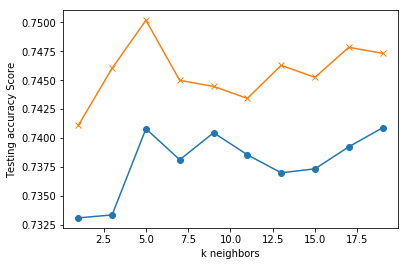

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

7. And the result is BAD .

8. Feature Scaling : Quantile tranformer

In [43]:
quantile_transformer = preprocessing.QuantileTransformer(
...     output_distribution='normal', random_state=0)

In [44]:
 X_trans = quantile_transformer.fit_transform(X)

In [45]:
quantile_transformer.quantiles_ 

array([[ 1.95423000e+03,  4.22242000e+01, -1.36530000e+05,
         0.00000000e+00,  3.30000000e+01,  5.00000000e+00],
       [ 2.24257465e+03,  4.85758638e+01, -1.53945015e+04,
         0.00000000e+00,  3.30000000e+01,  5.00000000e+00],
       [ 2.28699388e+03,  4.94812388e+01, -1.46637738e+04,
         2.00000000e+00,  3.30000000e+01,  5.00000000e+00],
       ...,
       [ 2.51506410e+04,  3.77273830e+05,  5.78836837e+03,
         1.76000000e+02,  5.40000000e+02,  1.23526046e+04],
       [ 2.57216220e+04,  3.98437712e+05,  1.55375375e+04,
         1.78614615e+02,  5.51614615e+02,  1.29859800e+04],
       [ 2.63209000e+04,  4.35761000e+05,  7.53000000e+04,
         1.80000000e+02,  5.86000000e+02,  1.39720000e+04]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y.values.reshape(-1,1), random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.727/0.733
k: 3, Train/Test Score: 0.741/0.751


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.752/0.762


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.755/0.767


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.758/0.769


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.767/0.777


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.763/0.779


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.765/0.779


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.766/0.781


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.768/0.783


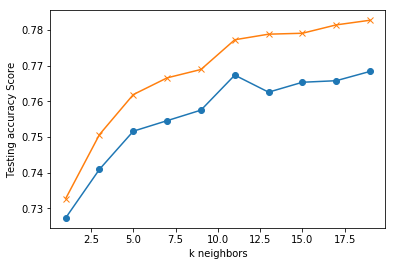

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

9.The highest is k: 11, Train/Test Score: 0.767/0.777

10. Features scaling : Normalization

In [48]:
X_normalized = preprocessing.normalize(X, norm='l2')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y.values.reshape(-1,1), random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.769/0.781


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 3, Train/Test Score: 0.770/0.784


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.772/0.785


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.771/0.785


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.772/0.786


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.771/0.785


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.770/0.784


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.763/0.775


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.763/0.774


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.758/0.769


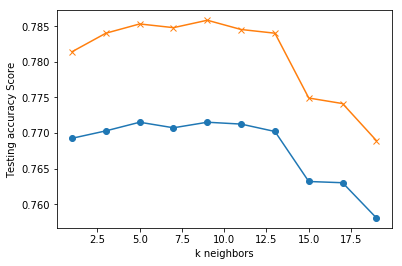

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

11. Result is not good. 

12. Let's try Decision tree classifier with the standard scaler

In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8235753317720531

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8696330991412958

In [53]:
feature_names=X.columns

In [54]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.23256160901784084, 'SL'),
 (0.19585700909528694, 'EEG'),
 (0.18456627794490044, 'TIME'),
 (0.15784464096466386, 'BP'),
 (0.11517915295809109, 'HR'),
 (0.11399131001921678, 'CIRCLUATION')]

13.There's no very low or very high scores.

14. SVM model. 

In [55]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.786


In [60]:
target_names=['1','0']

In [61]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88      3021
           0       0.00      0.00      0.00       822

   micro avg       0.79      0.79      0.79      3843
   macro avg       0.39      0.50      0.44      3843
weighted avg       0.62      0.79      0.69      3843



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [64]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7713319458896982, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.0001, score=0.77147319104633, total=   0.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.0001, score=0.77147319104633, total=   0.6s
[CV] C=1, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, score=0.7713319458896982, total=   0.7s
[CV] C=1, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.001, score=0.77147319104633, total=   0.6s
[CV] C=1, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.001, score=0.77147319104633, total=   0.6s
[CV] C=1, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, score=0.7713319458896982, total=   0.7s
[CV] C=1, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=0.01, score=0.77147319104633, total=   0.6s
[CV] C=1, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=0.01, score=0.77147319104633, total=   0.6s
[CV] C=5, gamma=0.0001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=5, gamma=0.0001, score=0.7713319458896982, total=   1.2s
[CV] C=5, gamma=0.0001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.0001, score=0.77147319104633, total=   3.4s
[CV] C=5, gamma=0.0001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.0001, score=0.77147319104633, total=   1.7s
[CV] C=5, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=5, gamma=0.001, score=0.7713319458896982, total=   1.3s
[CV] C=5, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=5, gamma=0.001, score=0.77147319104633, total=   3.6s
[CV] C=5, gamma=0.001 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=5, gamma=0.001, score=0.77147319104633, total=   1.8s
[CV] C=5, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.01, score=0.7713319458896982, total=   1.3s
[CV] C=5, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=5, gamma=0.01, score=0.77147319104633, total=   3.5s
[CV] C=5, gamma=0.01 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=5, gamma=0.01, score=0.77147319104633, total=   1.9s
[CV] C=10, gamma=0.0001 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, score=0.7713319458896982, total=  47.2s
[CV] C=10, gamma=0.0001 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.0001, score=0.77147319104633, total=  42.1s
[CV] C=10, gamma=0.0001 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.0001, score=0.77147319104633, total=  53.6s
[CV] C=10, gamma=0.001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, score=0.7713319458896982, total=  46.9s
[CV] C=10, gamma=0.001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.001, score=0.77147319104633, total=  44.2s
[CV] C=10, gamma=0.001 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.001, score=0.77147319104633, total=  51.3s
[CV] C=10, gamma=0.01 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, score=0.7713319458896982, total=  50.2s
[CV] C=10, gamma=0.01 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=0.01, score=0.77147319104633, total=  40.5s
[CV] C=10, gamma=0.01 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=0.01, score=0.77147319104633, total=  52.1s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.7min finished
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [65]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


The best score is only 0.77

In [67]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.786


15. SVM NAIVE Byes model.

In [68]:
from time import time

In [69]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [70]:
def Accuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB

    ### create classifier
    clf = GaussianNB()
    t0 = time()
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    ### use the trained classifier to predict labels for the test features
    pred = clf.predict(features_test)
    print( "predicting time:", round(time()-t0, 3), "s")
    ### calculate and return the accuracy on the test data
    from sklearn.metrics import accuracy_score
    accuracy=accuracy_score(labels_test, pred)
    return accuracy

In [71]:
Accuracy(X_train_scaled,y_train,X_test_scaled,y_test)



predicting time: 0.004 s


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7816809784022899